<a href="https://colab.research.google.com/github/alalghzy/model-decision-tree-heart-attack/blob/main/decision_tree_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import tree
import pandas as pd
import pydotplus
from IPython.display import Image

In [4]:
atribut = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal','target']
ds = pd.read_csv('sakit_jantung.csv', header=None, names=atribut)
ds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,0,0,1,1
1,37,1,2,130,250,0,1,187,0,0,0,2,1
2,41,0,1,130,204,0,0,172,0,2,0,2,1
3,56,1,1,120,236,0,1,178,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,2,0,2,1


In [5]:
sakit = pd.get_dummies(ds[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']])
sakit.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,0,0,1
1,37,1,2,130,250,0,1,187,0,0,0,2
2,41,0,1,130,204,0,0,172,0,2,0,2
3,56,1,1,120,236,0,1,178,0,2,0,2
4,57,0,0,120,354,0,1,163,1,2,0,2


In [6]:
# Pilih kolom yang akan diubah menjadi data dummy
columns_to_encode = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal']

# Buat data dummy
sakit = pd.get_dummies(ds[columns_to_encode])

sakit.to_csv('data_dummy_sakit_jantung.csv', index=False)

In [11]:
hasil = tree.DecisionTreeClassifier(criterion='entropy')
hasil_train = hasil.fit(sakit, ds['target'])

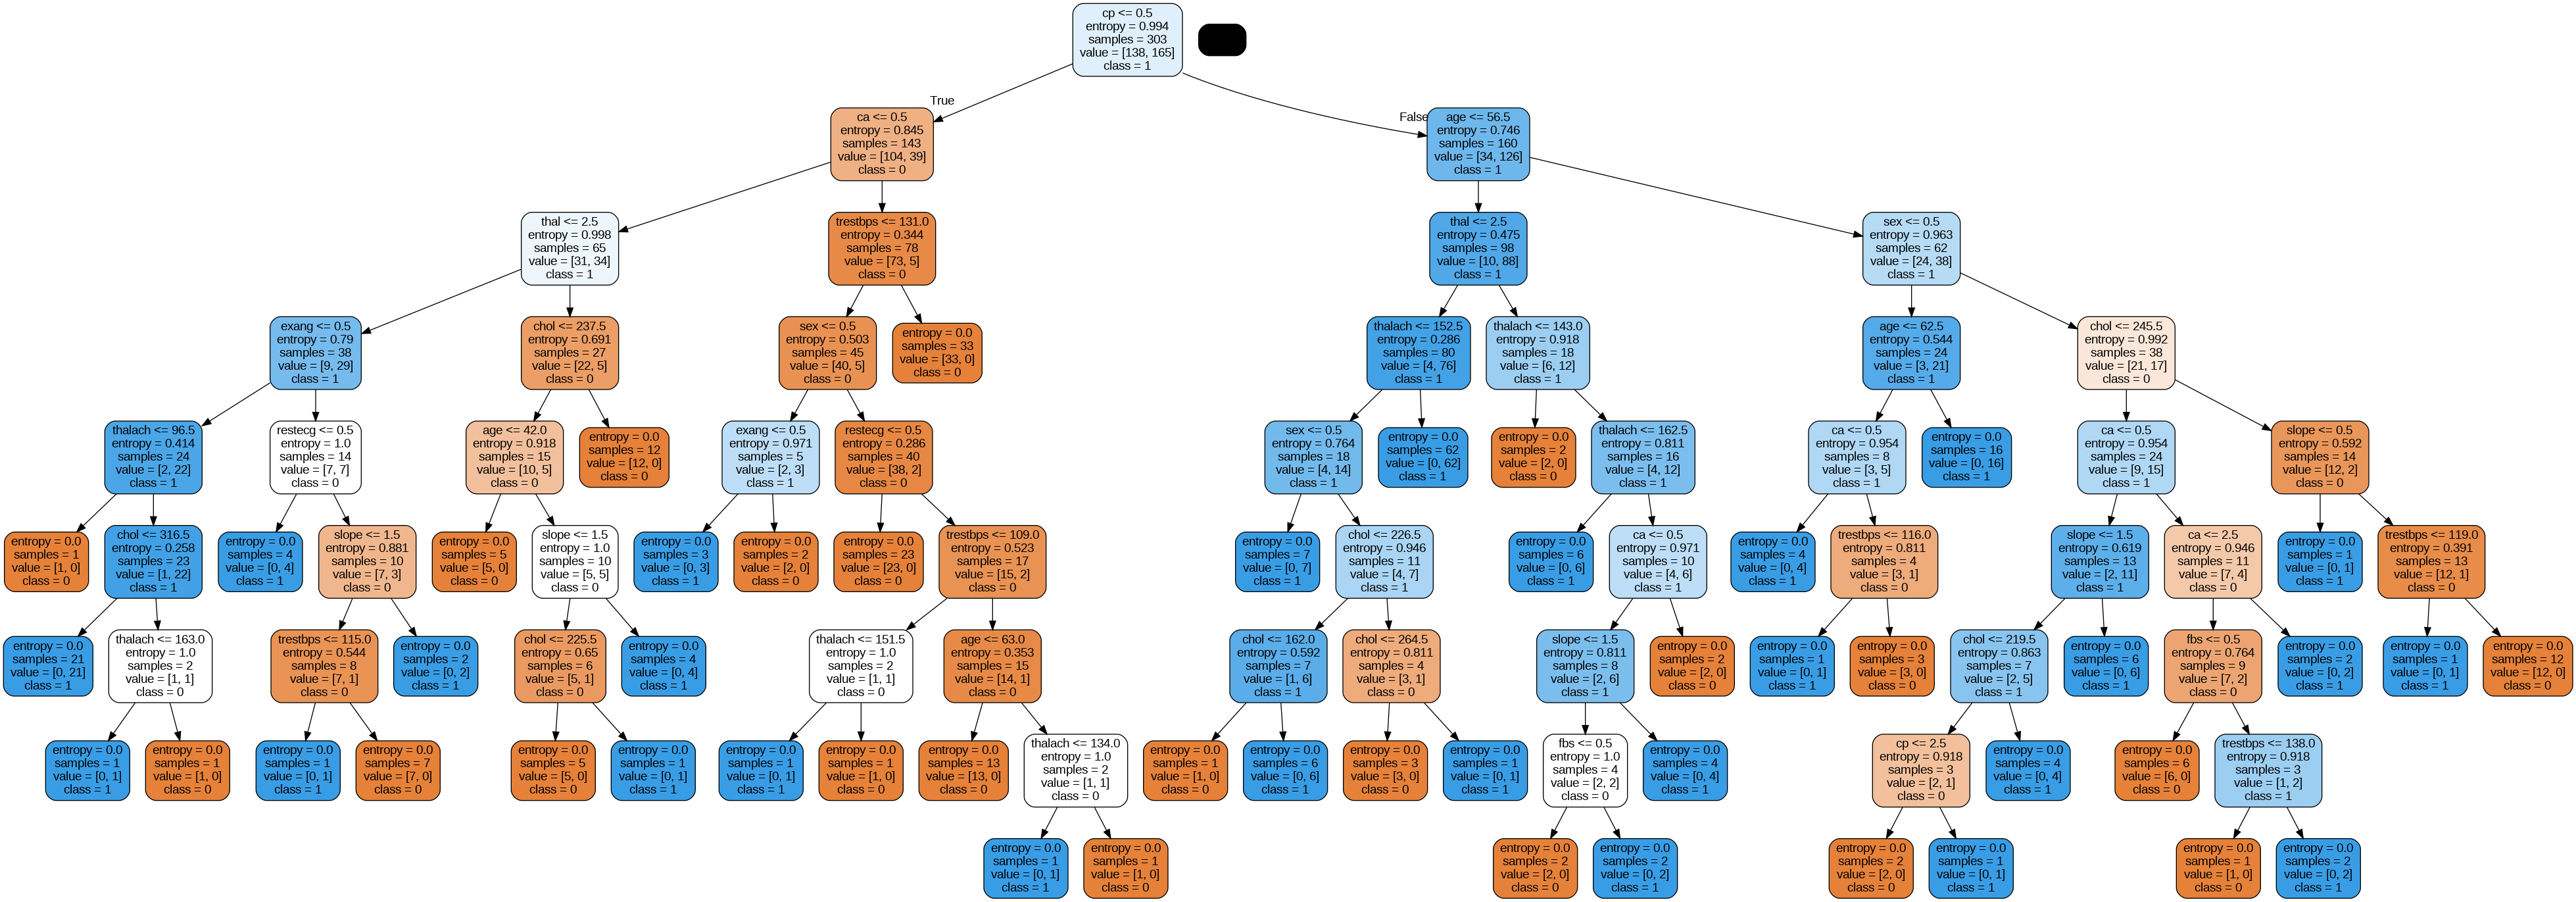

In [8]:
dot_data = tree.export_graphviz(hasil_train, out_file=None, feature_names=list(sakit.columns.values),
                                class_names=['0', '1'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())